In [2]:
from qiskit import QuantumCircuit,BasicAer,execute

In [3]:
qc=QuantumCircuit(1,1)
qc.h(0)
qc.measure_all()

In [4]:
backend=BasicAer.get_backend("qasm_simulator")
job=execute(qc,backend)
result=job.result()
result

Result(backend_name='qasm_simulator', backend_version='2.1.0', qobj_id='671a95ba-566c-4ac0-854c-67e34a2e4c3e', job_id='92c2f17c-4e25-41a6-9031-59912cdbf794', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 506, '0x2': 518}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['meas', 0]], creg_sizes=[['c', 1], ['meas', 1]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=1, name='circuit-0', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, name='circuit-0', seed_simulator=2043037321, time_taken=0.0019958019256591797)], status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='2.1.0'), time_taken=0.0019958019256591797)

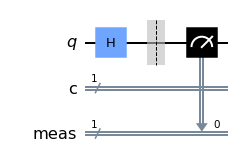

In [5]:
qc.draw()
qc.draw('mpl')

In [6]:
from qiskit import * 
circ = QuantumCircuit(3) #创建一个有三个量子比特的量子电路
circ.h(0)    #给第0个比特加一个H门
circ.cx(0, 1)    #给第0和1个比特加一个Cx门
circ.cx(0, 2)
 
#选择一个用于执行的后端，此处即态矢后端
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)    #execute()专门用于执行电路
result = job.result()
 
output = result.get_statevector(circ, decimals=3)
print(output)
circ.draw()

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

c:\Users\li\AppData\Local\conda\conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  # This is added back by InteractiveShellApp.init_path()


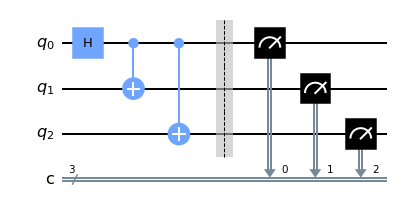

In [7]:
# 可以接续我们的测试代码
# 再创建一个量子电路以进行测量操作
# 绘图时会生成3 qubits + 3 bits = 6个道
meas = QuantumCircuit(3, 3)
# 在第0~2个量子比特道上加一个隔板以进行区分
meas.barrier(range(3))
# 建立从量子到经典的测量映射，相当于把测量结果移至经典道
meas.measure(range(3), range(3))
 
# 电路的可加性
qc = circ + meas
 
# 绘图（可选）
qc.draw("mpl")

In [8]:
# 导入OpenQASM后端
backend2 = Aer.get_backend('qasm_simulator')
 
# 基于OpenQASM后端运行我们的电路
# 这里用参数shots把样本数设定为1024（然而事实上是默认值）
job = execute(qc, backend2, shots=1024)
 
# 获得结果
result = job.result()
 
counts = result.get_counts(qc)
print(counts)

{'111': 521, '000': 503}


In [1]:
a=True+True
result = True + True
print(result)

2

In [11]:
from qiskit import QuantumCircuit, Aer, execute

# 创建一个有两个量子比特的量子线路
qc = QuantumCircuit(2)

# 应用CNOT门，第一个量子比特为控制，第二个量子比特为目标
qc.cx(0, 1)

# 测量量子比特
qc.measure_all()

# 使用模拟器运行量子线路
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1024)
result = job.result().get_counts()

print(result)

{'00': 1024}


In [13]:
from qiskit import QuantumCircuit, Aer, execute

# 创建一个包含两个量子比特和两个经典比特的量子电路
qc = QuantumCircuit(2, 2)
qc.h(0)
# 执行异或运算
qc.cx(0, 1)  # 应用CNOT门（控制比特0，目标比特1）来执行异或运算

# 测量量子比特并将结果存储到经典比特中
qc.measure([0, 1], [0, 1])

# 使用模拟器运行量子电路
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()

# 打印测量结果
counts = result.get_counts(qc)
print(counts)

{'00': 497, '11': 503}
